<a href="https://colab.research.google.com/github/reggiebain/data-projects/blob/main/Basketball_data_scraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## KenPom Data
- Below we scrape data from Ken Pomeroy's website, which has leading analytics about college basketball.
- We will primarily use built-in pandas tools to get the data on each team. Ultimately our goal will be to match it with Kaggle's ID's for each men's team.

There are quite a few issues with this dataset. The first is the most confusing:
1. **Bad Titles:** The column titles are giant tuples of ('Unnamed: 0_level_0', 'Rk',...). We don't actually have to do anything special with these, we just have to rename them based on what we see on the site.
2. **Bad Rows:** Every handful of rows (basically where you have to scroll down on the page) there's a row with no content. We'll have to remove these.
3. **Tournament Seeds:** For teams taht make the NCAA tournament (after the regular season) a seed is included in the name of the team column. We'll separate those.


In [22]:
import pandas as pd
import requests 

def get_clean_kenpom(year:int):
  
  # Check to make sure date range is ok
  if year < 2002 or year > 2023:
    raise Exception('Invalid Year -- data available from 2002-2023')

  # Import data from KenPom
  URL = 'https://kenpom.com/index.php?y='
  headers = {'User-Agent': 'Mozilla/5.0'} # Set header to make kenpom think you're a browser

  result = requests.get(URL + str(year), headers=headers) # Use requests to get data for given year
  data = pd.read_html(result.text)[0] # Get the text from the request and use process using read_html
  
  # Set the correct column names that we want
  columnNames = ['Rank', 'Team', 'Conference', 'W-L', 'AdjEM', 'AdjO', 'AdjO-Rank', 
                 'AdjD', 'AdjD-Rank', 'AdjT', 'AdjT-Rank', 'Luck', 'Luck-Rank', 
                 'AdjEM-SOS', 'AdjEM-SOS-Rank', 'OppO', 'OppO-Rank', 'OppD', 
                 'OppD-Rankk', 'NonCon-SOS-AdjEM', 'NonCon-SOS-AdjEM-Rank']
  
  data.columns = columnNames

  # Handle bad rows
  data = data[data.Rank != 'Rk'] # Get rid of the rows that just contain the row titles again  
  data = data[pd.notna(data.Rank)].reset_index(drop=True) # Get rid of rows that are just blank in that first column

  # Get the last character in a split of every team name to try to extract seeds
  seeds = data.Team.str.split().str[-1] # Split each row's Team column (sometimes this will be part of name)
  seeds = seeds.apply(lambda x: x if x.isdigit() else pd.NA) # Keep seed if its a seed, o.w. make N/A
  data['Tournament-Seed'] = seeds

  # For every team where there is a seed, keep only the team name portion
  data.loc[data.Team.str.split().str[-1].str.isdigit(), 'Team'] = data.Team.str.split().str[:-1].str.join(' ')
  
  return data                

In [23]:
ken_poms = {} # Dictionary that will contain ken pom DFs for each year
for year in range(2002,2024):
  ken_poms[year] = get_clean_kenpom(year)
ken_poms[2023]    

,Rank,Team,Conference,W-L,AdjEM,AdjO,AdjO-Rank,AdjD,AdjD-Rank,AdjT,...,Luck-Rank,AdjEM-SOS,AdjEM-SOS-Rank,OppO,OppO-Rank,OppD,OppD-Rankk,NonCon-SOS-AdjEM,NonCon-SOS-AdjEM-Rank,Tournament-Seed
0,1,Houston,Amer,32-3,+28.57,117.8,12,89.3,4,63.5,...,113,+4.08,93,107.0,101,103.0,87,+0.31,155,1
1,2,UCLA,P12,30-5,+28.08,115.3,21,87.2,1,66.2,...,201,+8.55,41,109.3,41,100.7,49,+0.54,150,2
2,3,Alabama,SEC,30-5,+27.49,116.4,18,88.9,3,72.7,...,38,+11.12,10,110.5,15,99.4,13,+10.60,5,1
3,4,Connecticut,BE,26-8,+26.26,120.1,4,93.9,17,66.6,...,314,+8.69,37,109.0,46,100.3,35,-1.56,211,4
4,5,Purdue,B10,29-5,+25.07,119.4,7,94.4,23,64.4,...,97,+10.26,17,110.6,12,100.3,38,+1.10,130,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358,359,Florida A&M,SWAC,7-22,-20.69,89.5,361,110.2,282,65.0,...,178,-4.50,271,101.5,318,106.0,194,+12.96,3,NaN
359,360,IUPUI,Horz,5-27,-21.79,95.9,334,117.6,360,67.1,...,332,-5.35,296,102.8,277,108.1,309,-6.68,329,NaN
360,361,Green Bay,Horz,3-29,-26.22,90.6,358,116.8,357,65.1,...,106,-2.34,217,104.5,185,106.8,241,+2.11,100,NaN
361,362,Hartford,ind,5-23,-29.49,89.4,362,118.9,362,65.5,...,278,-9.39,353,99.9,346,109.3,344,-9.26,356,NaN


In [ ]:
from google.colab import files
ken_poms.to_csv('kenpom-data.csv')
files.download("kenpom-data.csv")





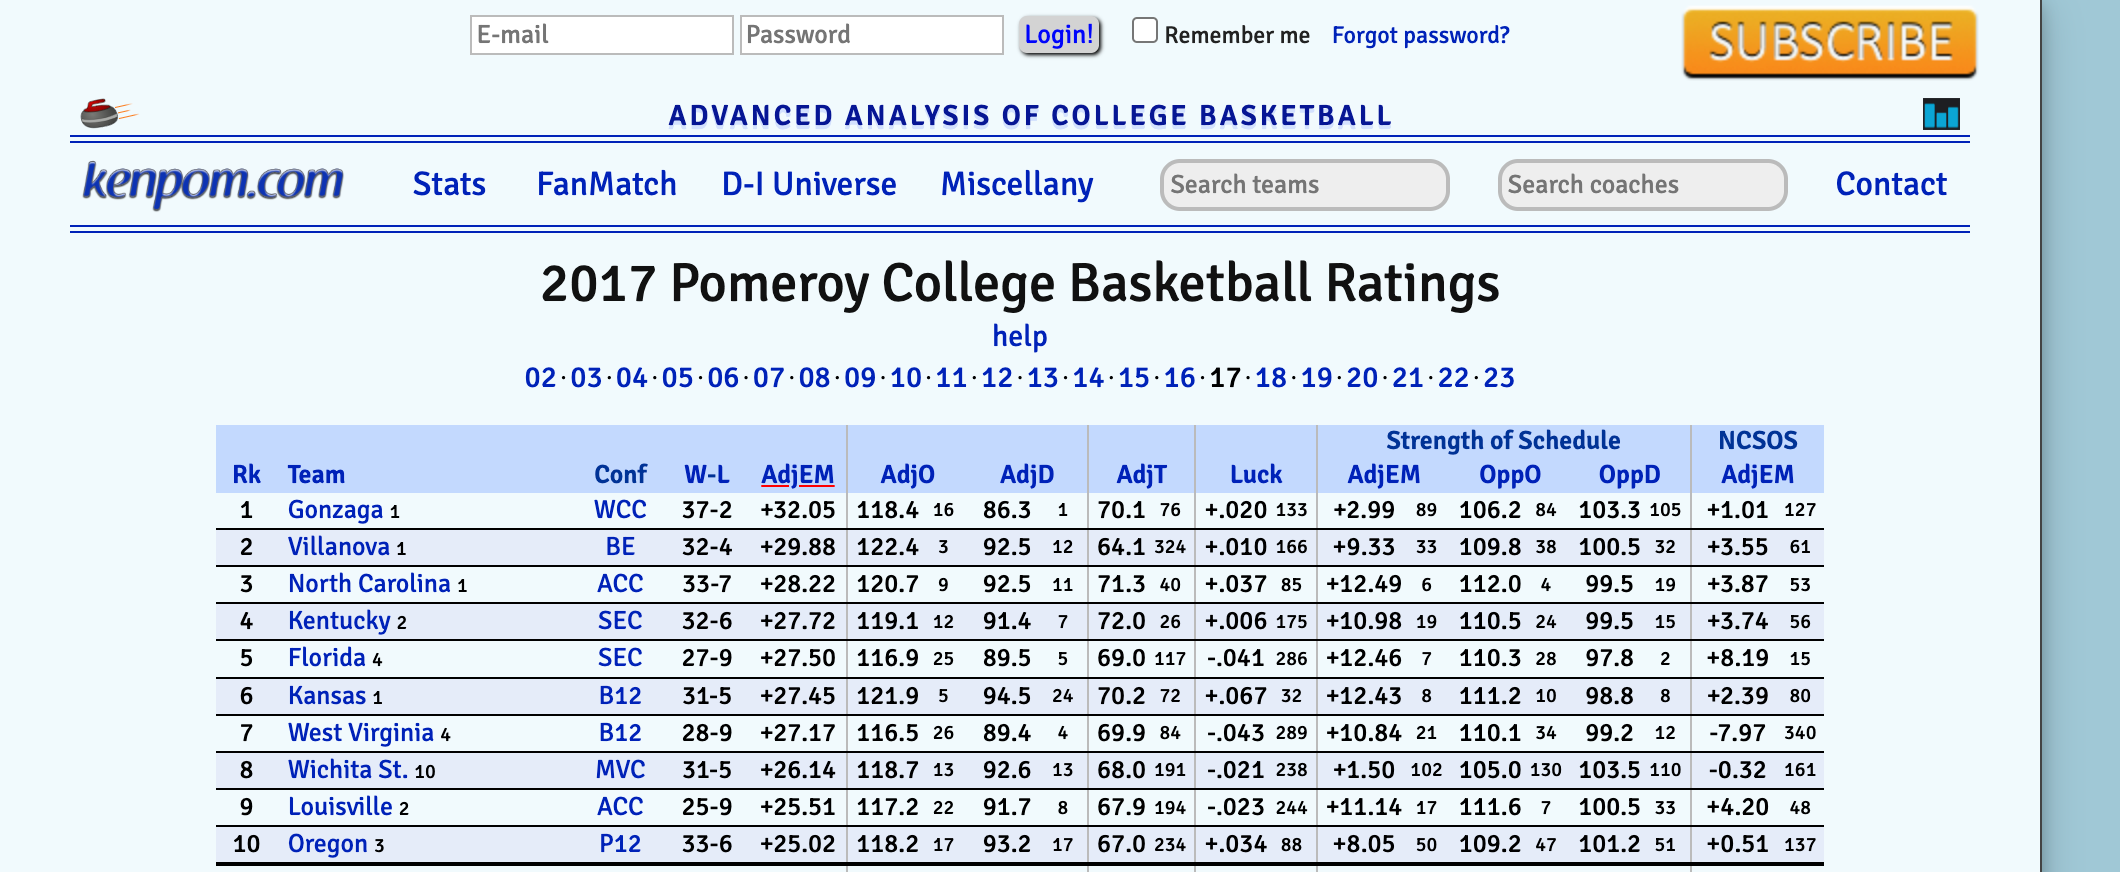